# Statsmodels

[![Open in Colab](https://lab.aef.me/files/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/lab/blob/main/files/statsmodels.ipynb)
[![Open in Kaggle](https://lab.aef.me/files/assets/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/adamelliotfields/lab/blob/main/files/statsmodels.ipynb)
[![Render nbviewer](https://lab.aef.me/files/assets/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/lab/blob/main/files/statsmodels.ipynb)
[![Try lite now](https://lab.aef.me/files/assets/badge.svg)](https://lab.aef.me/lab/?path=statsmodels.ipynb)

Visualizing various datasets included with [Statsmodels](https://github.com/statsmodels/statsmodels).

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


# converts fractional years to datetimes
def parse_time(d):
    year = int(d)
    month = d - year
    month = round(month * 12) + 1
    return datetime(year, month, 1).strftime("%Y-%m-%d")

## Datasets

You can download [datasets](https://www.rdocumentation.org/packages/datasets) from R.

### Iris

Originally collected by botanist Edgar Anderson and famously analyzed by Ronald Fisher, this is the "Hello World" dataset.

In [2]:
iris = sm.datasets.get_rdataset("iris").data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


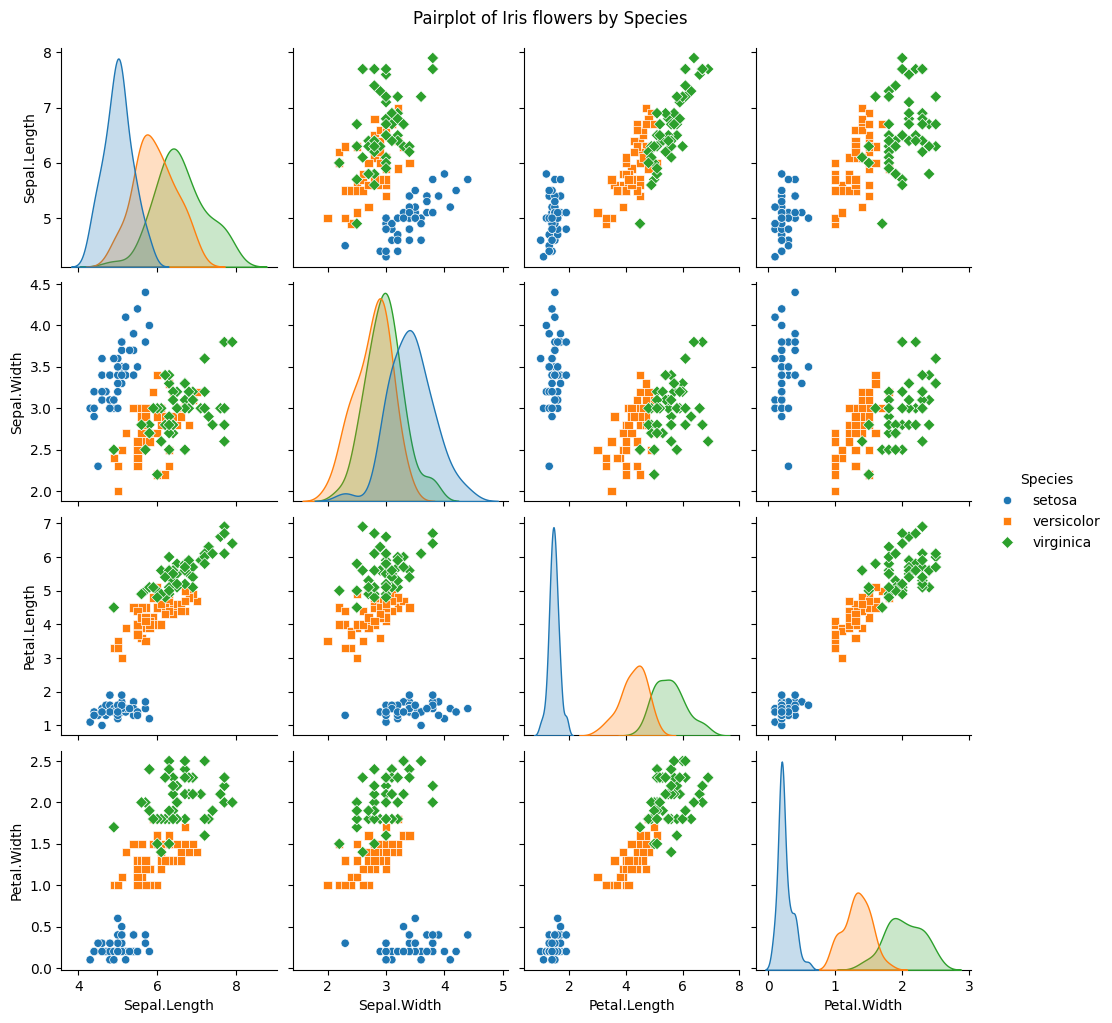

In [3]:
sns.pairplot(iris, hue="Species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris flowers by Species", y=1.02)
plt.show()

### Anscombe's Quartet

This is a famous dataset that shows how different datasets can have the same summary statistics. It's meant to demonstrate the importance of visualizing your data.

In [4]:
anscombe = sm.datasets.get_rdataset("anscombe").data
anscombe.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


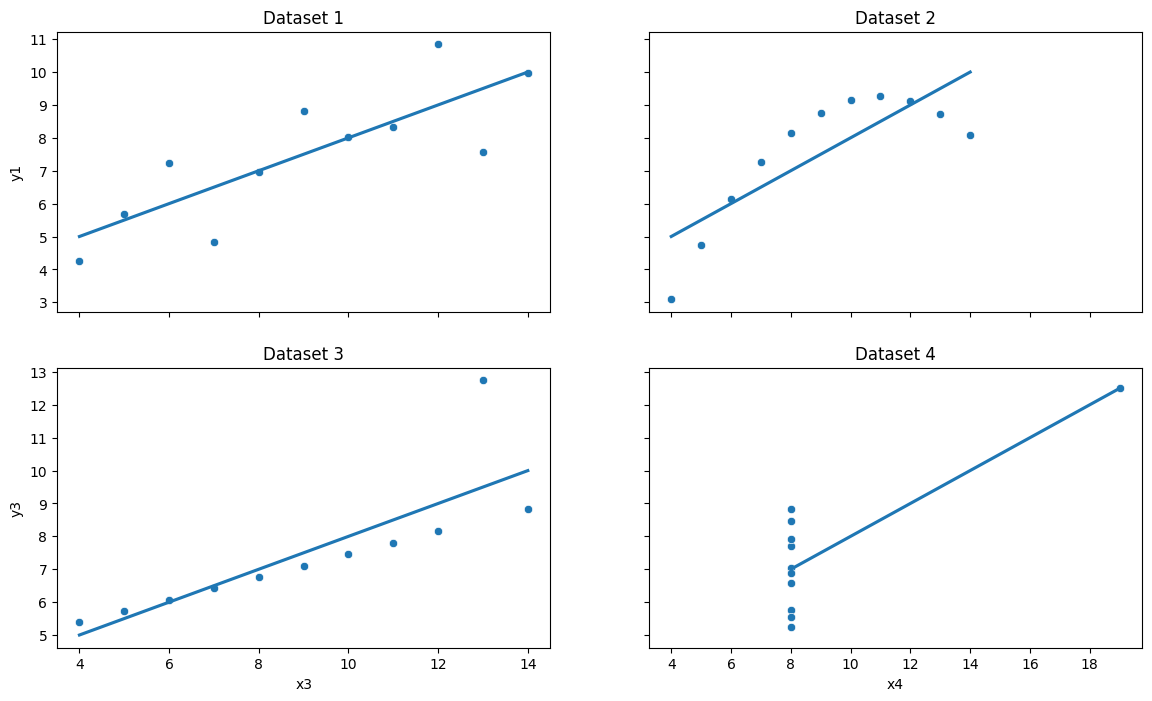

In [5]:
# plot
_, axes = plt.subplots(2, 2, figsize=(14, 8), sharex="col", sharey="row")

# iterate over the pairs of columns
for i in range(1, 5):
    ax = axes[(i - 1) // 2, (i - 1) % 2]
    x = anscombe[f"x{i}"]
    y = anscombe[f"y{i}"]
    sns.scatterplot(x=x, y=y, ax=ax)
    sns.regplot(x=x, y=y, ax=ax, scatter=False, ci=None)
    ax.set_title(f"Dataset {i}")

plt.show()

### Air Passengers

These are monthly totals of international airline passengers from 1949 to 1960. It is the "Iris" of time series datasets made famous by Box and Jenkins in [_Time Series Analysis: Forecasting and Control_](https://www.wiley.com/en-us/Time+Series+Analysis%3A+Forecasting+and+Control%2C+5th+Edition-p-9781118674918).

In [6]:
air_passengers = sm.datasets.get_rdataset("AirPassengers").data
air_passengers["time"] = air_passengers["time"].apply(parse_time)
air_passengers.head()

,time,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


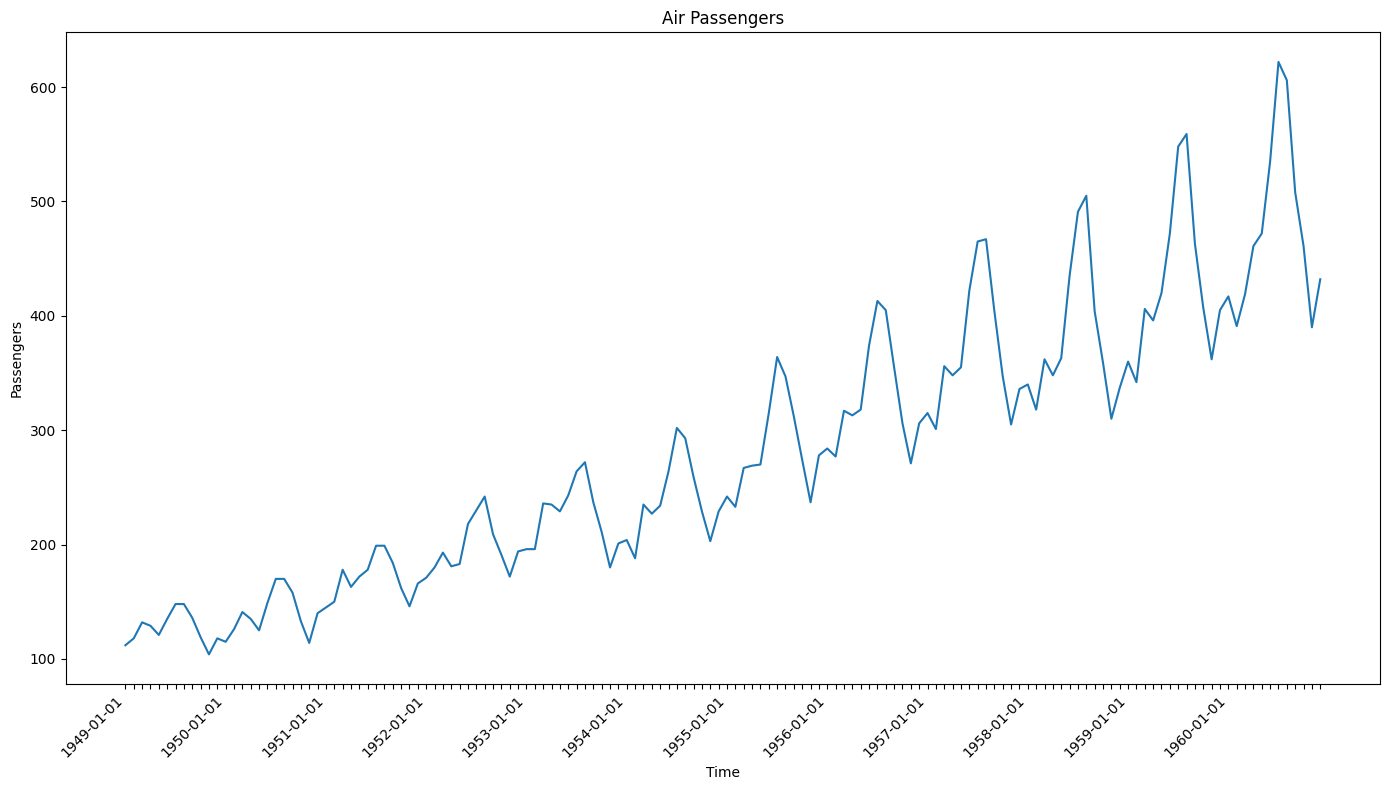

In [7]:
# plot
_, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel("Time")
ax.set_ylabel("Passengers")

sns.lineplot(air_passengers, x="time", y="value", ax=ax)

n = 12
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % n != 0:
        label.set_visible(False)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Air Passengers")
plt.show()

### Sunspots

This dataset contains the number of sunspots observed from 1749 to 1983, recorded monthly.

In [8]:
sunspots = sm.datasets.get_rdataset("sunspots").data
sunspots["time"] = sunspots["time"].apply(parse_time)
sunspots.head()

,time,value
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


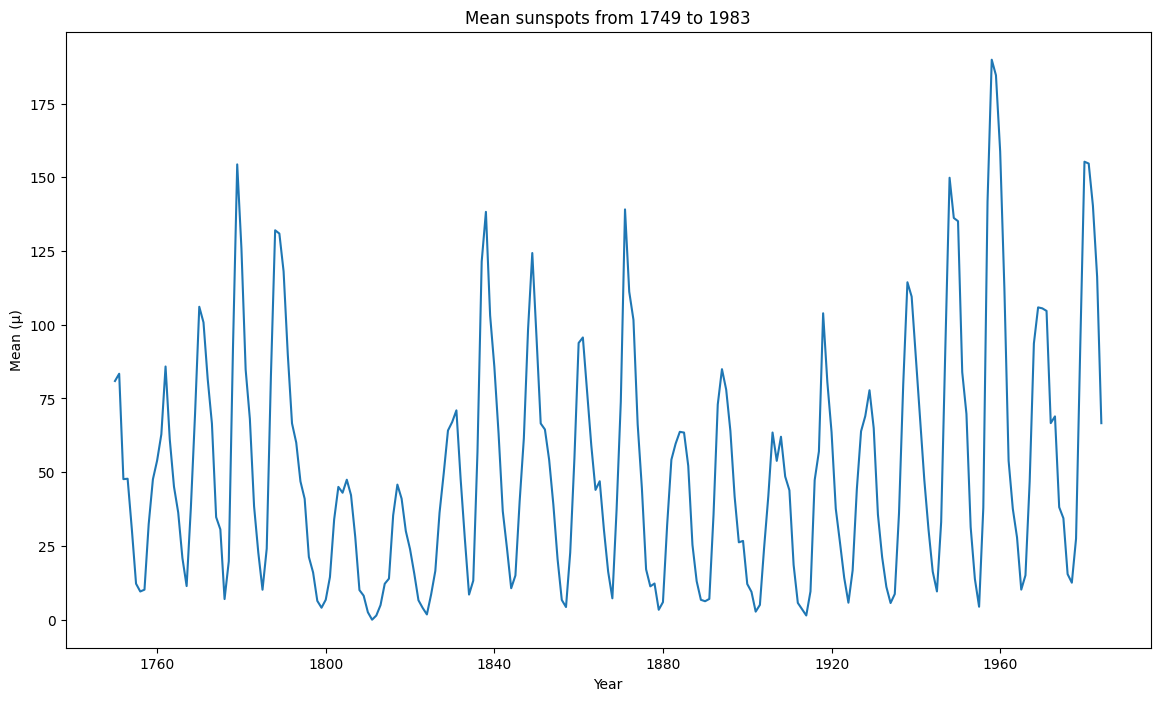

In [9]:
# resample to yearly frequency
sunspots["time"] = pd.to_datetime(sunspots["time"])
sunspots.set_index("time", inplace=True)
sunspots = sunspots.resample("YE").mean()

# plot
_, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel("Year")
ax.set_ylabel("Mean (μ)")

sns.lineplot(sunspots, x=sunspots.index, y="value", ax=ax)
plt.title("Mean sunspots from 1749 to 1983")
plt.show()

### Longley

This is a dataset that contains 7 economic variables that were measured from 1947 to 1962. It's meant to demonstrate multicollinearity, where the independent variables are highly correlated, which can cause problems in regression.

In [10]:
longley = sm.datasets.get_rdataset("longley").data
longley.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


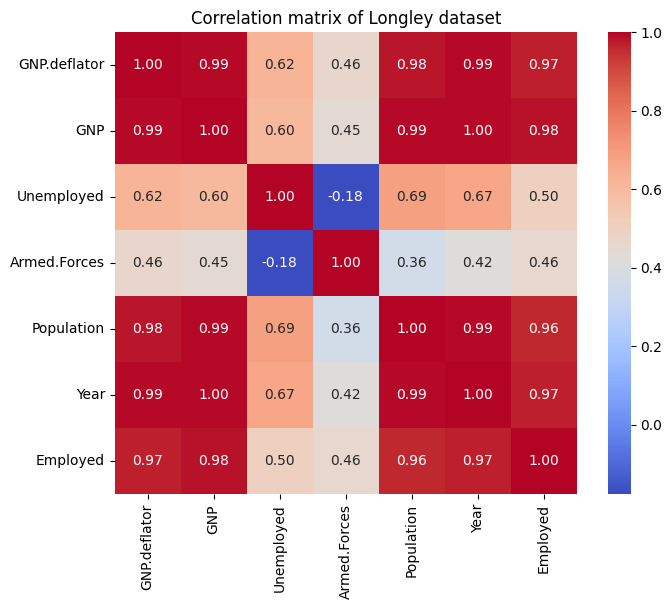

In [11]:
corr = longley.corr()

# plot heatmap
_, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Correlation matrix of Longley dataset")

sns.heatmap(corr, ax=ax, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()